#### 05_01 얼굴 눈 감지를 위해 OpenCV Haar Cascade 구성

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### cascade 파일읽기

In [44]:
face_cascade = cv2. CascadeClassifier('../99_Studyfile/02_Sample/haarcascade_frontalface_default.xml')
eye_cascade = cv2. CascadeClassifier('../99_Studyfile/02_Sample/haarcascade_eye.xml')

##### 얼굴 이미지 데이터 읽기

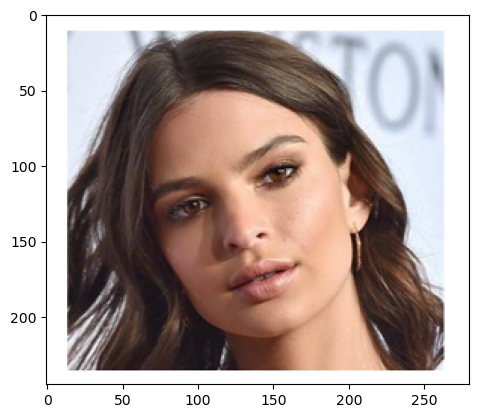

In [45]:
face_image = cv2.imread('../99_Studyfile/02_Sample/face.png')
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image_copy = face_image.copy()

plt.imshow(face_image)
plt.show()

#### 05_02 얼굴 이미지 바운딩 박스 처리 : 케스케이드 경우는 그레이 스케일 이미지에서만 자동한다.

[[ 49  48 160 160]]
얼굴 객체 인식 좌표 :  49 48 160 160


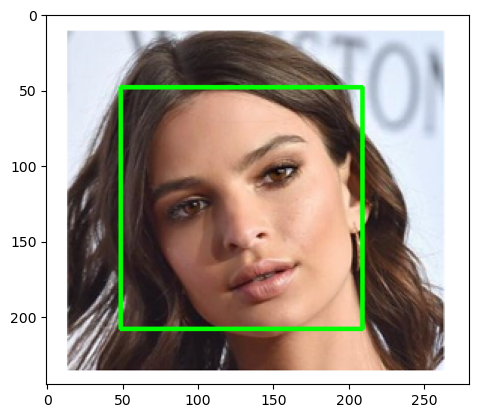

In [46]:
face_gray_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)

faces_box_info = face_cascade.detectMultiScale(face_gray_image, 1.1, 4) # 이미지 사이즈에 따라 변동

print(faces_box_info)
for (x,y,w,h) in faces_box_info:
    print('얼굴 객체 인식 좌표 : ',x,y,w,h)
    cv2.rectangle(face_image, (x,y),(x+w,y+h),(0,255,0),2)
    
plt.imshow(face_image)
plt.show()

#### 05_03 눈 감지

[[30 63 33 33]
 [81 37 42 42]]
0 30 63 33 33
1 81 37 42 42


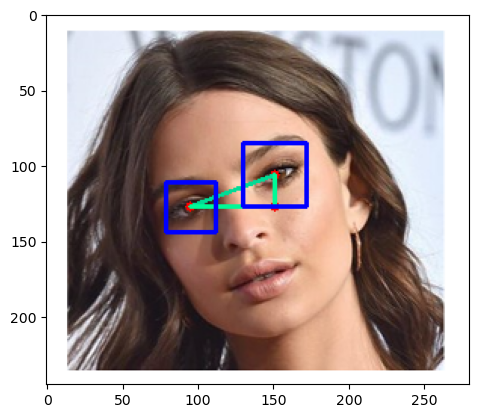

In [61]:
roi_gray = face_gray_image[y:(y+h), x:(x+w)]
roi_color = face_image_copy[y:(y+h), x:(x+w)]

eyes_box_info = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
i = 0

print(eyes_box_info)

for i, (ex,ey,ew,eh) in enumerate(eyes_box_info):
    print(i,ex,ey,ew,eh)
    if i == 0 :
        eye_1 = (ex,ey,ew,eh)
    elif i == 1 :
        eye_2 = (ex,ey,ew,eh)
        
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255), 2)
        
        i = i + 1
    
plt.imshow(face_image_copy)
plt.show()

#### 얼굴 정렬 - 01

In [48]:
print(eye_1[0], eye_2[0])

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

print(left_eye,right_eye)

81 30
(30, 63, 33, 33) (81, 37, 42, 42)


left eye center 좌표 :  46 79
right eye center 좌표 :  102 58


<function matplotlib.pyplot.show(close=None, block=None)>

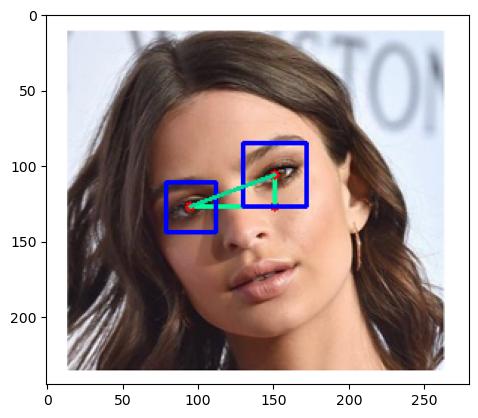

In [62]:
left_eye_center = (int(left_eye[0] + (left_eye[2]/2)), int(left_eye[1] + (left_eye[3]/2)))
left_eye_center_x = left_eye_center[0]
left_eye_center_y = left_eye_center[1]
print('left eye center 좌표 : ', left_eye_center_x, left_eye_center_y)

right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_center_x = right_eye_center[0]
right_eye_center_y = right_eye_center[1]
print('right eye center 좌표 : ', right_eye_center_x, right_eye_center_y)

cv2.circle(roi_color, left_eye_center, 3, (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 3, (255,0,0), -1)
cv2.line(roi_color, left_eye_center, right_eye_center, (0,220,150),2)

plt.imshow(face_image_copy)
plt.show

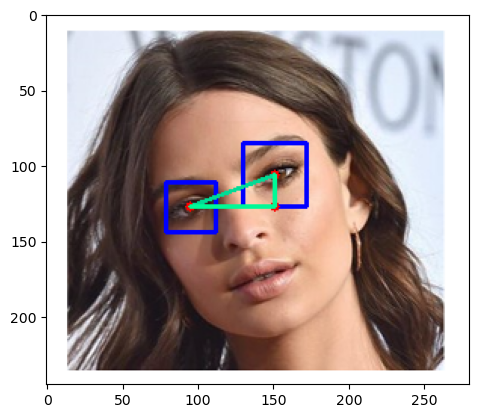

In [63]:
if left_eye_center_y > right_eye_center_y:
    A = (right_eye_center_x, left_eye_center_y)
    direction = -1
else:
    A = (left_eye_center_x,left_eye_center_y)
    direction = 1

cv2.circle(roi_color, A, 3, (255,0,0), -1)
cv2.line(roi_color, left_eye_center, A, (0,250,150),2)
cv2.line(roi_color, right_eye_center, A, (0,250,150),2)

plt.imshow(face_image_copy)
plt.show()

#### 각도 계산

In [64]:
delta_x = right_eye_center_x - left_eye_center_x
delta_y = right_eye_center_y - left_eye_center_y

angle = np.arctan(delta_y/delta_x)
angle = (angle*100)/np.pi
print(angle)

-11.420025121990815


#### 이미지를 각도 세타 만큼 회전

이미지 height, width 값 >>  245 280
image center values >>  (140, 122)
[[  0.98020203  -0.19799994  26.92770778]
 [  0.19799994   0.98020203 -25.30463921]]


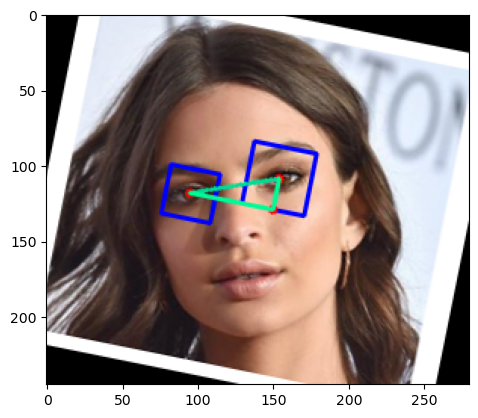

In [66]:
height, width, _ = face_image_copy.shape
print('이미지 height, width 값 >> ',height,width)

image_center = (width // 2 , height // 2)
print('image center values >> ', image_center)

M = cv2.getRotationMatrix2D(image_center, (angle), 1.0)
print(M)

rotated = cv2.warpAffine(face_image_copy, M, (width,height))

plt.imshow(rotated)
plt.show()